### Which countries produce the most successful F1 drivers
Factors:
Number of race wins
Ratio of race wins to total number of races
Scaled points
Teammate comparison (Giving evidence based reasons)
Which countries produce the best 


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [239]:
driver_standings_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/driver_standings.csv')
drivers_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/drivers.csv')
seasons_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/seasons.csv')
results_df = pd.read_csv('../Datasets/F1-championship(1950-2024)/results.csv')

In [240]:
driver_standings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34595 entries, 0 to 34594
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  34595 non-null  int64  
 1   raceId             34595 non-null  int64  
 2   driverId           34595 non-null  int64  
 3   points             34595 non-null  float64
 4   position           34595 non-null  int64  
 5   positionText       34595 non-null  object 
 6   wins               34595 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.8+ MB


In [241]:
driver_standings_df.describe()

,driverStandingsId,raceId,driverId,points,position,wins
count,34595.000000,34595.000000,34595.000000,34595.000000,34595.000000,34595.000000
mean,42944.384188,580.120104,313.460760,14.114939,19.778928,0.273074
std,21859.815278,289.290183,272.052171,37.235186,16.331054,1.024520
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,19767.500000,352.000000,87.000000,0.000000,8.000000,0.000000
50%,49910.000000,600.000000,222.000000,1.000000,16.000000,0.000000
75%,59299.500000,803.000000,517.000000,10.000000,26.000000,0.000000
max,72871.000000,1132.000000,860.000000,575.000000,108.000000,19.000000


In [242]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [243]:
driver_standings_df.groupby('driverId').max(numeric_only=True)['wins']


driverId
1      11
2       0
3       9
4       7
5       1
       ..
856     0
857     0
858     0
859     0
860     0
Name: wins, Length: 852, dtype: int64

In [244]:
df_ds = driver_standings_df.copy()
df_ds.sort_values(by='wins', ascending=False)

,driverStandingsId,raceId,driverId,points,position,positionText,wins
34322,72496,1120,830,575.0,1,1,19
34320,72474,1119,830,549.0,1,1,18
34278,72430,1118,830,524.0,1,1,17
34256,72408,1117,830,491.0,1,1,16
33878,71822,1096,830,454.0,1,1,15
...,...,...,...,...,...,...,...
12401,22929,488,217,0.0,26,26,0
12400,22928,488,194,0.0,30,30,0
12399,22927,488,216,0.0,23,23,0
12398,22926,488,215,0.0,32,32,0


In [245]:
drivers_df[drivers_df['driverId'] == 830]

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
829,830,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen


In [246]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [247]:
results_df

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,\N,\N,46,16,1:30.875,233.371,12
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,\N,\N,50,6,1:29.707,236.409,12
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,\N,\N,43,17,1:31.014,233.014,12
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,\N,\N,3,19,1:31.298,232.289,34


In [248]:
df_overall = results_df[results_df['positionOrder']==1].groupby('driverId').sum(numeric_only=True)[['positionOrder', 'points', 'laps']].sort_values(by='positionOrder', ascending=False )

In [249]:
df_overall

,positionOrder,points,laps
driverId,,,
1,104,2469.0,6237
30,91,910.0,5802
830,61,1531.5,3681
20,53,1250.0,3109
117,51,461.5,3296
...,...,...,...
525,1,8.0,200
526,1,8.0,200
559,1,8.0,200


In [250]:
df_overall = df_overall.merge(drivers_df, on='driverId', how='inner')
df_overall

,driverId,positionOrder,points,laps,driverRef,number,code,forename,surname,dob,nationality,url
0,1,104,2469.0,6237,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,30,91,910.0,5802,michael_schumacher,\N,MSC,Michael,Schumacher,1969-01-03,German,http://en.wikipedia.org/wiki/Michael_Schumacher
2,830,61,1531.5,3681,max_verstappen,33,VER,Max,Verstappen,1997-09-30,Dutch,http://en.wikipedia.org/wiki/Max_Verstappen
3,20,53,1250.0,3109,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel
4,117,51,461.5,3296,prost,\N,\N,Alain,Prost,1955-02-24,French,http://en.wikipedia.org/wiki/Alain_Prost
...,...,...,...,...,...,...,...,...,...,...,...,...
109,525,1,8.0,200,bryan,\N,\N,Jimmy,Bryan,1926-01-28,American,http://en.wikipedia.org/wiki/Jimmy_Bryan
110,526,1,8.0,200,ruttman,\N,\N,Troy,Ruttman,1930-03-11,American,http://en.wikipedia.org/wiki/Troy_Ruttman
111,559,1,8.0,200,flaherty,\N,\N,Pat,Flaherty,1926-01-06,American,http://en.wikipedia.org/wiki/Pat_Flaherty_(rac...
112,577,1,4.0,98,musso,\N,\N,Luigi,Musso,1924-07-28,Italian,http://en.wikipedia.org/wiki/Luigi_Musso


In [251]:
df_overall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   driverId       114 non-null    int64  
 1   positionOrder  114 non-null    int64  
 2   points         114 non-null    float64
 3   laps           114 non-null    int64  
 4   driverRef      114 non-null    object 
 5   number         114 non-null    object 
 6   code           114 non-null    object 
 7   forename       114 non-null    object 
 8   surname        114 non-null    object 
 9   dob            114 non-null    object 
 10  nationality    114 non-null    object 
 11  url            114 non-null    object 
dtypes: float64(1), int64(3), object(8)
memory usage: 10.8+ KB


In [252]:
df_overall_by_nationality = df_overall.groupby('nationality').sum(numeric_only = True)['positionOrder']
df_overall_by_nationality =df_overall_by_nationality.sort_values(ascending =False)
df_overall_by_nationality

nationality
British          312
German           179
Brazilian        101
French            81
Dutch             61
Finnish           57
Australian        43
Italian           43
Austrian          41
Argentine         38
Spanish           35
American          33
Canadian          17
New Zealander     12
Swedish           12
Belgian           11
South African     10
Mexican            8
Colombian          7
Swiss              7
Monegasque         6
Polish             1
Venezuelan         1
Name: positionOrder, dtype: int64

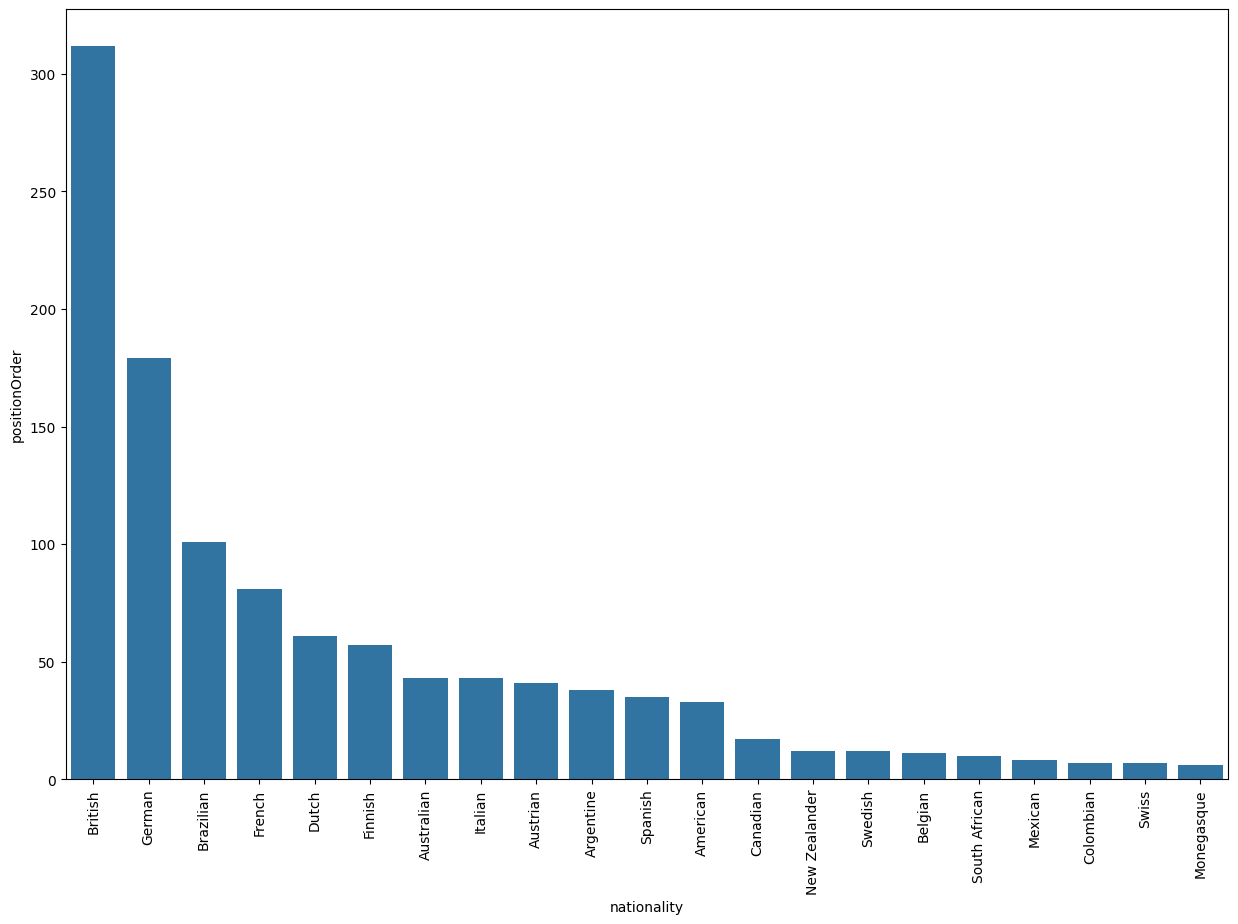

In [253]:
fig, ax = plt.subplots(figsize = (15,10))
plt.xticks(rotation=90)
ax = sns.barplot(df_overall_by_nationality[df_overall_by_nationality>5])


In [254]:
df_driver_counts = df_overall.groupby('nationality').count()['driverId']
df_driver_counts = df_driver_counts.loc[df_overall_by_nationality.index]
df_driver_counts

nationality
British          21
German            7
Brazilian         6
French           14
Dutch             1
Finnish           5
Australian        4
Italian          15
Austrian          3
Argentine         3
Spanish           2
American         15
Canadian          2
New Zealander     2
Swedish           3
Belgian           2
South African     1
Mexican           2
Colombian         1
Swiss             2
Monegasque        1
Polish            1
Venezuelan        1
Name: driverId, dtype: int64

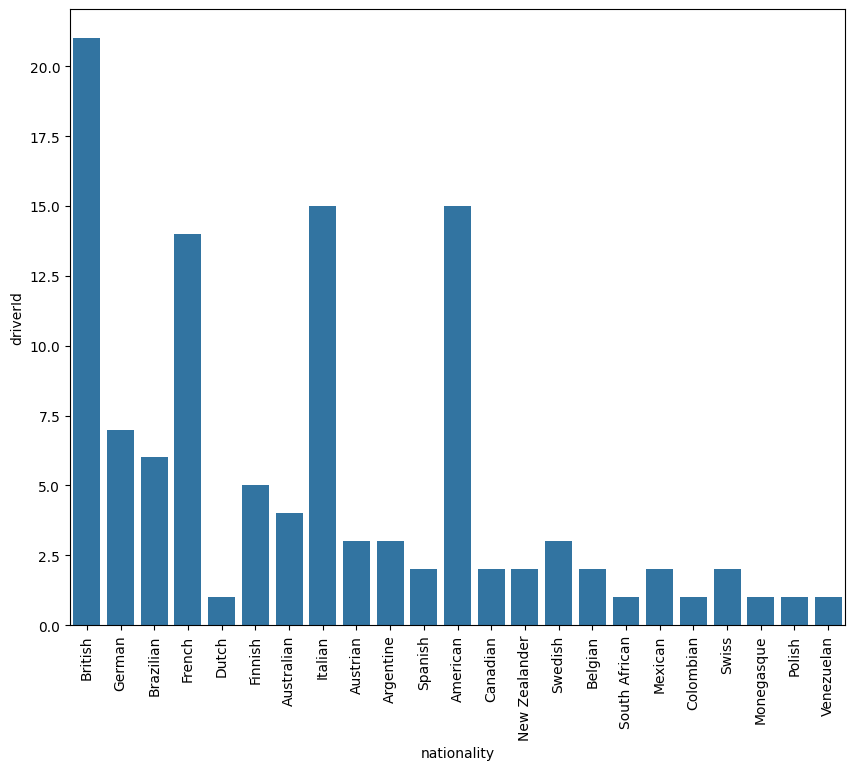

In [255]:
fig, ax = plt.subplots(figsize = (10,8))
ax = sns.barplot(df_driver_counts)
plt.xticks(rotation = 90);


In [256]:
df_driver_counts_sorted = df_driver_counts.loc[df_overall_by_nationality.index]

In [257]:
df_races_by_nationality = results_df.merge(drivers_df, how='inner', on = 'driverId')
df_races_by_nationality = df_races_by_nationality.groupby(['nationality']).count()['resultId']
df_races_by_nationality= df_races_by_nationality.loc[df_overall_by_nationality.index]

In [258]:
df_races_by_nationality

nationality
British          4521
German           2418
Brazilian        1953
French           3072
Dutch             524
Finnish          1181
Australian        874
Italian          3418
Austrian          690
Argentine         373
Spanish           889
American         1312
Canadian          486
New Zealander     401
Swedish           510
Belgian           591
South African     210
Mexican           456
Colombian         125
Swiss             496
Monegasque        166
Polish             99
Venezuelan        120
Name: resultId, dtype: int64

Text(0, 0.5, 'Races competed in')

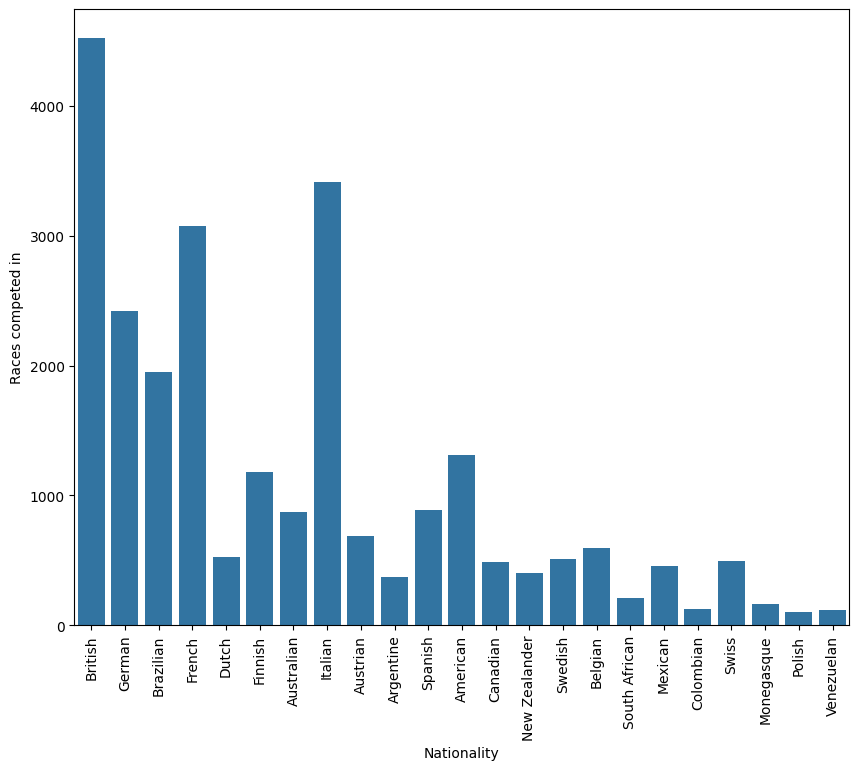

In [259]:
fig, ax = plt.subplots(figsize=(10,8))
ax = sns.barplot(df_races_by_nationality)
plt.xticks(rotation = 90);
ax.set_xlabel('Nationality')
ax.set_ylabel('Races competed in')

In [260]:
df_number_races = results_df.groupby('driverId').count()[['positionOrder', 'points', 'laps']].sort_values(by='positionOrder', ascending=False )
df_number_races['races'] = df_number_races['positionOrder']
df_number_races.drop(['positionOrder', 'points', 'laps'], axis = 1, inplace=True)
df_number_races.columns.name = None

In [261]:
df_number_races

,races
driverId,
4,392
8,352
1,344
22,326
18,309
...,...
584,1
419,1
582,1


In [262]:
df_overall = df_number_races.merge(df_overall, on='driverId', how = 'inner')
df_overall

,driverId,races,positionOrder,points,laps,driverRef,number,code,forename,surname,dob,nationality,url
0,4,392,32,485.0,1952,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
1,8,352,21,255.0,1232,raikkonen,7,RAI,Kimi,Räikkönen,1979-10-17,Finnish,http://en.wikipedia.org/wiki/Kimi_R%C3%A4ikk%C...
2,1,344,104,2469.0,6237,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
3,22,326,11,110.0,640,barrichello,\N,BAR,Rubens,Barrichello,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello
4,18,309,15,265.0,898,button,22,BUT,Jenson,Button,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,786,8,1,4.0,77,fagioli,\N,\N,Luigi,Fagioli,1898-06-09,Italian,http://en.wikipedia.org/wiki/Luigi_Fagioli
110,559,6,1,8.0,200,flaherty,\N,\N,Pat,Flaherty,1926-01-06,American,http://en.wikipedia.org/wiki/Pat_Flaherty_(rac...
111,657,5,2,17.0,400,vukovich,\N,\N,Bill,Vukovich,1918-12-13,American,http://en.wikipedia.org/wiki/Bill_Vukovich
112,628,5,1,8.0,200,sweikert,\N,\N,Bob,Sweikert,1926-05-20,American,http://en.wikipedia.org/wiki/Bob_Sweikert


In [266]:
df_races =  df_overall.groupby('nationality').sum()['races'].sort_values(ascending = False)
df_races_by_nationality

nationality
British          4521
German           2418
Brazilian        1953
French           3072
Dutch             524
Finnish          1181
Australian        874
Italian          3418
Austrian          690
Argentine         373
Spanish           889
American         1312
Canadian          486
New Zealander     401
Swedish           510
Belgian           591
South African     210
Mexican           456
Colombian         125
Swiss             496
Monegasque        166
Polish             99
Venezuelan        120
Name: resultId, dtype: int64